## HELLO , ENTERING THE WORLD OF MACHINE LEARNING

 price predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("Newbook.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() #no missing data , all the column have 506 coloumn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts() #quick look on the data 

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.290639,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703316,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.889000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
#for plotting histogram
#housing.hist(bins=50 , figsize=(20,15))

## spliting train and test data

In [10]:
#import numpy as np
#def split_train_test(data, test_ratio): # making the function for spliting he data in the two set
#    print(shuffled)
#    test_set_size = int(len(data) * test_ratio)
#    test_indices=shuffled[:test_set_size]
#    train_indices=shuffled[test_set_size:]
#    return data.iloc[train_indices], data.iloc[test_indices]

##problem in the upper train_ test set is that every time when we re run the shuffled , every time the new value will come , so thus aour modle will see all the values but we dont want to shocase the test data value to the modle , so that why we do following operation: we set the seed of random generator . by , np.random.seed(42) 

In [11]:
import numpy as np
def split_train_test(data, test_ratio): # making the function for spliting he data in the two set
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2) ## using the upper function

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [13]:
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")

Rows in train set : 405
Rows in test set : 101



#this all code and function is already written in the sklearn so now we will implement this whole with the ,  sklearn

In [14]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.2, random_state=42)
#this all the variable in the train_test_split is same as the above which we learn in the function

In [15]:
#print statement
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}\n")


Rows in train set : 404
Rows in test set : 102



here the difference in the result of the both code is because , of the round off , around 0.5

the problem in this data is , the CHAS feature have the value 0 and 1 only , so we havent shown our traiuning data that the CHAS value can be one also , so this will hamoer our prediction so this is soved by stratified sampling 

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1 , test_size=0.2 , random_state=42 )
for train_index, test_index in split.split(housing , housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    

In [17]:
strat_test_set['CHAS'].value_counts()



0    95
1     7
Name: CHAS, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [19]:
#95/7   

In [20]:
#376/28   almost same ratio for both the , sets , thsi si called as the stratified shufflining 

In [21]:
housing = strat_train_set.copy()

# looking for correlations 

In [22]:
corr_matrix = housing.corr()

In [23]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680766
B          0.361761
 ZN        0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel=' ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel=' ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel=' ZN'>,
        <AxesSubplot:xlabel='RM', ylabel=' ZN'>,
        <AxesSubplot:xlabel=' ZN', ylabel=' ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel=' ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel=' ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

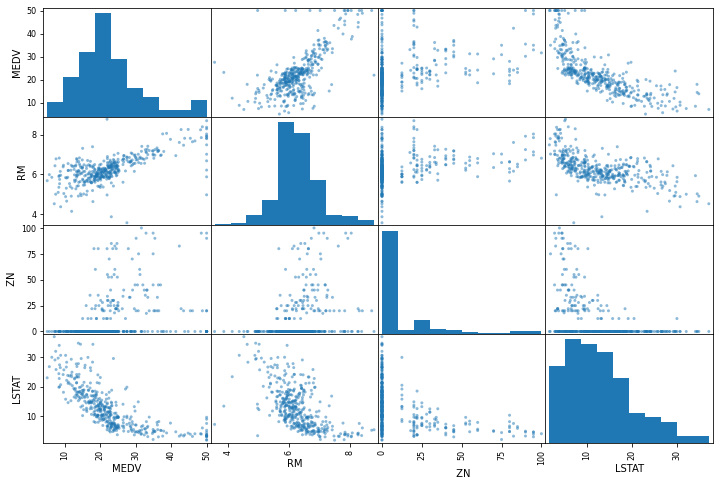

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM"," ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

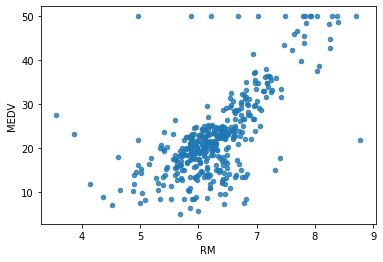

In [25]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Attribute combination

In [26]:
housing["TAXRM"]= housing['TAX']/ housing['RM']  # combining the two attributes


In [27]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [28]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.680766
B          0.361761
 ZN        0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527292
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

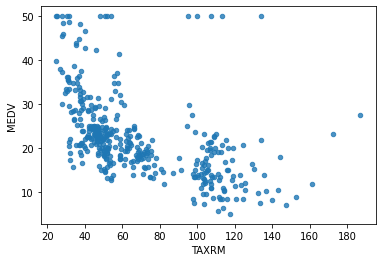

In [29]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [30]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

##  Missing attributes

In [31]:
#To take care of the missing attributes , you have three options
#    1. get rid of the missing data points
#    2. get rid of the whole attributes
#    3. set the missing values to some values (0, mean or medium)

In [32]:
# doing option 1
a = housing.dropna(subset=["RM"])
a.shape #quick look on the data 

(400, 13)

In [33]:
#doing option 2.
housing.drop("RM", axis=1).shape # no RM column

(404, 12)

In [34]:
median = housing["RM"].median()  # computing the median for option 3

In [35]:
median

6.2175

In [36]:
housing["RM"].fillna(median)   # option 3


254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
housing.shape # orignal data frame unchanged

(404, 13)

In [38]:
housing.describe() # before we start the imputing 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.286298,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713459,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.884750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [41]:
X = imputer.transform(housing)

In [42]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [43]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.285616,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709942,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.887250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## scikit -learn design

three types of objects 
1. estimaters - estimates some parameters based on a dataset eg - imputer
it has a fit method and transform method
fit method- fit the data set and calculate the internal parameters
2. transformers - takes input and returns output based on the learning form fit it also has a convinence function called as fit-transform() which fits and then transform()
3. predictors - linearregression model is an example of pridictor. fit() and preict() are two function . it also give score function which will evaluate the predction

## feature scaling

two types of feature scaling methods:
    1. min-max scaling(normalization)
     (value-min)/(max-min)
        sklearn provide a class called MinMaxScaler for this
    2. standardization
         (value-mean)/std
        sklearn provides a class called standard scaler for this

## creating the pipeline

pipeline - method so that we can change the things later

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #.......add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])

In [45]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [46]:
housing_num_tr


array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [47]:
housing_num_tr.shape

(404, 13)

## selecting a desired model 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

RandomForestRegressor()

In [49]:
some_data = housing.iloc[:5]

In [50]:
some_labels = housing_labels.iloc[:5]

In [51]:
prepared_data = my_pipeline.transform(some_data)

In [52]:
model.predict(prepared_data)

array([22.441, 25.553, 16.438, 23.441, 23.438])

In [53]:
list(some_labels)


[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating the model

In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [55]:
rmse

1.1629499767895652

## using better evaluation technique - Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr , housing_labels, scoring ="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [57]:
rmse_scores

array([2.72880775, 2.68774252, 4.37757269, 2.61497635, 3.3264351 ,
       2.57951554, 4.78430644, 3.27949079, 3.38856943, 3.23338614])

In [58]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean:",scores.mean())
    print("standarddeviation:",scores.std())

In [59]:
print_scores(rmse_scores)

scores: [2.72880775 2.68774252 4.37757269 2.61497635 3.3264351  2.57951554
 4.78430644 3.27949079 3.38856943 3.23338614]
Mean: 3.300080273826159
standarddeviation: 0.7118430233134548


## saving the model 

In [60]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## testing the model on the test data 

In [61]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[24.835 11.444 25.555 21.821 18.649 15.039 20.209 14.529 31.28  40.769
 19.687 11.847 23.9   28.993 19.54  10.63  31.737 14.585 23.623 19.028
 19.736 18.199 17.397 22.326 18.125 30.543 16.069 32.651  8.809 33.604
 23.552 21.4   22.799 10.835 20.86  11.137 42.623 24.267 23.197 41.442
 23.753 29.381 20.659 20.993 20.252 33.566 44.419 20.041 20.071 21.844
 21.593 14.792 21.396 15.051 24.645 32.715 42.27  28.191 19.382 20.809
 47.376  9.981 19.059 24.56  15.024 32.793 19.408 18.056 18.92  33.836
 27.288 22.89  21.966 22.422 35.15  12.781 15.824 19.906 20.801 21.574
 22.134 21.589 14.421 22.786 20.965 21.093 13.866 21.492 22.075 23.157
 18.748 27.213  7.291 26.169 18.91  29.947 19.549 31.086 14.614 26.494
 20.598 20.127] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [62]:
final_rmse

2.9597526675283476

In [63]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.25049455, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])